In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hydrogels.theory.models.integrator import Simulation, Equation


In [8]:
def radius(N: int = 0, nV: float = 1.0) -> 'R':
    """Radius from number of particles and density"""
    return ((3/4*np.pi)*N*nV) ** (1./3.)

def potential(R: float = 0, K: float = 1.0, rc: float = 10.) -> 'V':
    """Harmonic potential with cutoff"""
    if R == 0:
        return 0.
    elif R > rc:
        return 0.
    else:
        return K * R ** -2
    
def rate(V: float = 0.0, beta: float = 1.0, KV: float = 1.0, c0: float = 1.0) -> 'k':
    """rate from potential, concentratin and rate of encounter"""
    return KV * c0 * np.exp(beta * V)

def number(N: int = 0, k: float = 1.0, dt: float = 1.0) -> 'N':
    """New number from old number and rate"""
    return int(N - k*dt)

equations = [Equation(i, string=i.__doc__) for i in [radius, potential, rate, number]]
simu = Simulation(
    0.01,
    variables = {
        'N' : 10000,
        'R' : None,
        'V' : None,
        'k' : None
    },
    constants = {
        'nV' : 1.0,
        'KV' : 10.,
        'c0' : 0.01,
        'beta' : 1.0,
        'K' : 10.0,
        'rc' : 40.0
    },
    equations = equations
)
print(f'\nsimu.variables: {simu.variables}')
print(f'\nsimu.constants: {simu.constants}')
print(f'\nsimu.inputs: {simu.inputs}')
print(f'\nsimu.equations: {simu.equations}')
print(f'\nsimu.history.meta: {simu.history.meta}')
print(f'\nsimu.history.dataframe:\n{simu.history.dataframe}')
None


simu.variables: {'N': 10000, 'R': None, 'V': None, 'k': None}

simu.constants: {'nV': 1.0, 'KV': 10.0, 'c0': 0.01, 'beta': 1.0, 'K': 10.0, 'rc': 40.0, 'dt': 0.01}

simu.inputs: {'nV': 1.0, 'KV': 10.0, 'c0': 0.01, 'beta': 1.0, 'K': 10.0, 'rc': 40.0, 'dt': 0.01, 'N': 10000, 'R': None, 'V': None, 'k': None}

simu.equations: [radius := Radius from number of particles and density, potential := Harmonic potential with cutoff, rate := rate from potential, concentratin and rate of encounter, number := New number from old number and rate]

simu.history.meta: {'constants': {'nV': 1.0, 'KV': 10.0, 'c0': 0.01, 'beta': 1.0, 'K': 10.0, 'rc': 40.0, 'dt': 0.01}, 'equations': ['radius := Radius from number of particles and density', 'potential := Harmonic potential with cutoff', 'rate := rate from potential, concentratin and rate of encounter', 'number := New number from old number and rate']}

simu.history.dataframe:
       N     R     V     k    t
0  10000  None  None  None  0.0


In [9]:
simu.run(10000)
print(f'\nsimu.history.dataframe:\n{simu.history.dataframe}')


simu.history.dataframe:
           N          R         V          k       t
0      10000        NaN       NaN        NaN    0.00
1       9999  28.668417  0.012167   0.101224    0.01
2       9998  28.667461  0.012168   0.101224    0.02
3       9997  28.666506  0.012169   0.101224    0.03
4       9996  28.665550  0.012170   0.101224    0.04
...      ...        ...       ...        ...     ...
9996       4   2.275414  1.931431   0.689938   99.96
9997       3   2.112307  2.241227   0.940487   99.97
9998       2   1.919158  2.715054   1.510542   99.98
9999       1   1.676539  3.557727   3.508335   99.99
10000      0   1.330670  5.647539  28.359270  100.00

[10001 rows x 5 columns]


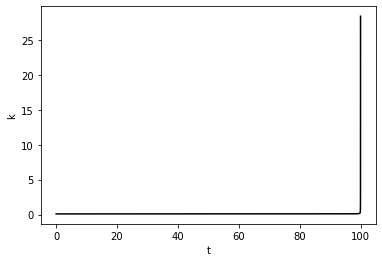

In [10]:
plt.plot(simu.history.dataframe['t'], simu.history.dataframe['k'], 'k-')
plt.xlabel('t')
plt.ylabel('k')
None

In [40]:
radius.__annotations__

{'N': int, 'nV': float, 'return': 'R'}